#3I005 Projet Exploration/Exploitation

##BESSOUL Amine et BOUKHALFI Mourad

#Partie 1 : Bandits manchots

In [1]:
import random

import math

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
def jouer(machine, action):

    """ A travers cette fonction, on simule l'action d'un levier d'une machine """

    prob = machine[action]

    n = random.random()

    if n < prob :

        return 1

    else :

        return 0


##Test :

In [3]:
jouer([0.3, 0.4, 0.2, 1, 7], 3)

1

###Algorithmes :
###Aglorithme aléatoire :

In [4]:
def algo_alea(moyennes, liste_ni):

    """ Une action est choisie uniformément parmi toutes celles possibles """

    return random.randint(0,len(moyennes)-1)


###Algorithme greedy :

In [5]:
def algo_greedy(moyennes, liste_ni):

    n = 500 # nombre d'itérations

    """ Choisit une action en suivant l'algorithme greedy"""  

    if np.sum(liste_ni) < n :

        return algo_alea(moyennes, liste_ni)

    else :

        return np.argmax(moyennes)


###Algorithme e-greedy :

In [6]:
def algo_e_greedy(moyennes, liste_ni):

    """ Choisit une action en suivant l'algorithme e-greedy """

    e = 0.4

    if random.random() < e : 

        return algo_alea(moyennes, liste_ni)

    else : 

        return algo_greedy(moyennes, liste_ni)


###Algorithme UCB :

In [7]:
def algo_ucb(moyennes, liste_ni):

    """ Choisit une action en suivant l'algorithme Upper Confidence Bound """

    t = np.sum(liste_ni) 

    for i in range(len(liste_ni)):

        if liste_ni[i] ==  0 :

            return i

    return np.argmax([moyennes[i] + math.sqrt(2*math.log(t)/liste_ni[i]) for i in range(len(moyennes))])


In [8]:

## Simulation

In [9]:
def simulation(algorithme, machine, nb_coups):

    """Simule un jeu de machines à sous : On tire sur les leviers en suivant un algorithme choisi

    Affiche le regret en fonction du temps à l'aide d'un graphe, ainsi que les estimations des différents algorithmes"""

    

    # Initialisations des différents tableaux et variables

    moyennes = np.array([0.0 for i in range(len(machine))])

    liste_gains = np.array([0.0 for i in range(len(machine))])

    liste_ni = np.array([0 for i in range(len(machine))])

    liste_regret = np.array([0 for i in range(nb_coups)])

    gain_ideal = 0

    action_ideale = np.argmax(machine)

    

    for i in range(nb_coups):

        action = algorithme(moyennes, liste_ni)

        gain = jouer(machine, action)

        gain_ideal += jouer(machine, action_ideale)

        liste_gains[action] += gain

        liste_ni[action] += 1

        moyennes[action] = round(liste_gains[action] / liste_ni[action], 2)

        liste_regret[i] = gain_ideal-np.sum(liste_gains)

    plt.ylabel("Regret")

    plt.xlabel("Nombre d'itérations")

    print("Simulation:\n")

    print("machine:\n", machine)

    print("moyennes estimées: \n", moyennes)

    print("Courbe de regrets en fonction du temps")

    plt.plot([i for i in range(nb_coups)], liste_regret)

    plt.show()


##Test:

In [10]:
machin = [0.7, 0.5, 0.25, 0.1, 0.4, 0.9]

T = 50


Simulation:

machine:
 [0.7, 0.5, 0.25, 0.1, 0.4, 0.9]
moyennes estimées: 
 [0.74 0.49 0.26 0.07 0.38 0.89]
Courbe de regrets en fonction du temps


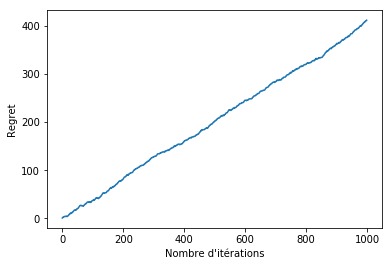

In [11]:
simulation(algo_alea, machin, 1000)

Simulation:

machine:
 [0.7, 0.5, 0.25, 0.1, 0.4, 0.9]
moyennes estimées: 
 [0.69 0.49 0.26 0.12 0.42 0.91]
Courbe de regrets en fonction du temps


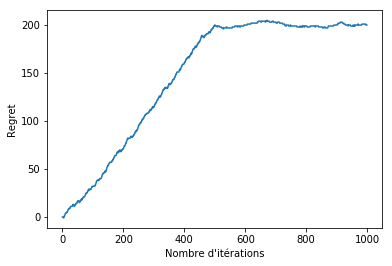

In [12]:
simulation(algo_greedy, machin, 1000)

Simulation:

machine:
 [0.7, 0.5, 0.25, 0.1, 0.4, 0.9]
moyennes estimées: 
 [0.7  0.45 0.26 0.11 0.45 0.9 ]
Courbe de regrets en fonction du temps


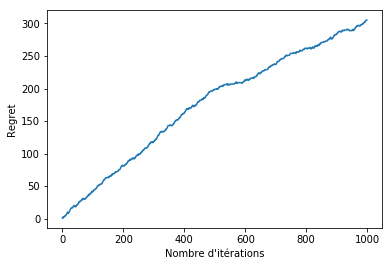

In [13]:
simulation(algo_e_greedy, machin,1000)

Simulation:

machine:
 [0.7, 0.5, 0.25, 0.1, 0.4, 0.9]
moyennes estimées: 
 [0.66 0.53 0.32 0.23 0.36 0.9 ]
Courbe de regrets en fonction du temps


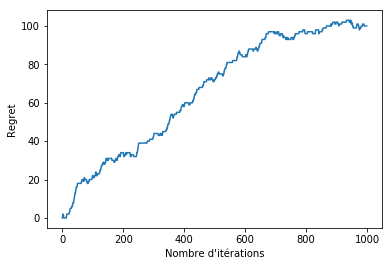

In [14]:
simulation(algo_ucb, machin, 1000)

#Partie 2 : Morpion et Monte-Carlo

In [15]:
import numpy as np

import copy

import matplotlib.pyplot as plt

import matplotlib.patches as patches

import random

%matplotlib inline 

In [16]:
## Constante

OFFSET = 0.2

class State:

    """ Etat generique d'un jeu de plateau. Le plateau est represente par une matrice de taille NX,NY,

    le joueur courant par 1 ou -1. Une case a 0 correspond a une case libre.

    * next(self,coup) : fait jouer le joueur courant le coup.

    * get_actions(self) : renvoie les coups possibles

    * win(self) : rend 1 si le joueur 1 a gagne, -1 si le joueur 2 a gagne, 0 sinon

    * stop(self) : rend vrai si le jeu est fini.

    * fonction de hashage : renvoie un couple (matrice applatie des cases, joueur courant).

    """

    NX,NY = None,None

    def __init__(self,grid=None,courant=None):

        self.grid = copy.deepcopy(grid) if grid is not None else np.zeros((self.NX,self.NY),dtype="int")

        self.courant = courant or 1

    def next(self,coup):

        pass

    def get_actions(self):

        pass

    def win(self):

        pass

    def stop(self):

        pass

    @classmethod

    def fromHash(cls,hash):

        return cls(np.array([int(i)-1 for i in list(hash[0])],dtype="int").reshape((cls.NX,cls.NY)),hash[1])

    def hash(self):

        return ("".join(str(x+1) for x in self.grid.flat),self.courant)


In [17]:
class Jeu:

    """ Jeu generique, qui prend un etat initial et deux joueurs.

        run(self,draw,pause): permet de joueur une partie, avec ou sans affichage, avec une pause entre chaque coup. 

                Rend le joueur qui a gagne et log de la partie a la fin.

        replay(self,log): permet de rejouer un log

    """

    def __init__(self,init_state = None,j1=None,j2=None):

        self.joueurs = {1:j1,-1:j2}

        self.state = copy.deepcopy(init_state)

        self.log = None

    def run(self,draw=False,pause=0.5):

        log = []

        if draw:

            self.init_graph()

        while not self.state.stop():

            coup = self.joueurs[self.state.courant].get_action(self.state)

            log.append((self.state,coup))

            self.state = self.state.next(coup)

            if draw:

                self.draw(self.state.courant*-1,coup)

                plt.pause(pause)

        return self.state.win(),log

    def init_graph(self):

        self._dx,self._dy  = 1./self.state.NX,1./self.state.NY

        self.fig, self.ax = plt.subplots()

        for i in range(self.state.grid.shape[0]):

            for j in range(self.state.grid.shape[1]):

                self.ax.add_patch(patches.Rectangle((i*self._dx,j*self._dy),self._dx,self._dy,\

                        linewidth=1,fill=False,color="black"))

        plt.show(block=False)

    def draw(self,joueur,coup):

        color = "red" if joueur>0 else "blue"

        self.ax.add_patch(patches.Rectangle(((coup[0]+OFFSET)*self._dx,(coup[1]+OFFSET)*self._dy),\

                        self._dx*(1-2*OFFSET),self._dy*(1-2*OFFSET),linewidth=1,fill=True,color=color))

        plt.draw()

    def replay(self,log,pause=0.5):

        self.init_graph()

        for state,coup in log:

            self.draw(state.courant,coup)

            plt.pause(pause)


In [18]:
class MorpionState(State):


    NX,NY = 3,3

    def __init__(self,grid=None,courant=None):

        super(MorpionState,self).__init__(grid,courant)

    def next(self,coup):

        state =  MorpionState(self.grid,self.courant)

        state.grid[coup]=self.courant

        state.courant *=-1

        return state

    def get_actions(self):

        return list(zip(*np.where(self.grid==0)))

    def win(self):

        for i in [-1,1]:

            if ((i*self.grid.sum(0))).max()==3 or ((i*self.grid.sum(1))).max()==3 or ((i*self.grid)).trace().max()==3 or ((i*np.fliplr(self.grid))).trace().max()==3: return i

        return 0

    def stop(self):

        return self.win()!=0 or (self.grid==0).sum()==0

    def __repr__(self):

        return str(self.hash())


In [19]:

class Agent:

    """ Classe d'agent generique. Necessite une methode get_action qui renvoie l'action correspondant a l'etat du jeu state"""

    def __init__(self):

        pass

    def get_action(self,state):

        pass

##Joueur aléatoire :

In [20]:
class Joueur_Aleatoire(Agent):

    def __init__(self,name):

        self.name = name

    

    def get_action(self,state):

        coups_possibles = state.get_actions() 

        return coups_possibles[random.randint(0,len(coups_possibles)-1)] 


##Joueur Monte-Carlo :

In [21]:
class Joueur_MonteCarlo(Agent):

    def __init__(self,name):

        self.name = name


    def get_action(self,state):

        N=5

        coups_possibles = state.get_actions()

        n = len(coups_possibles)

        res = np.zeros(n)

        parties = np.zeros(n)

        j1 = Joueur_Aleatoire('Player1')

        j2 = Joueur_Aleatoire('Player2')

        for i in range(N):

            joueur_courant = state.courant

            lancer = random.randint(0,len(coups_possibles)-1)

            action = coups_possibles[lancer]

            jeu = Jeu(state.next(action),j1,j2)

            result = jeu.run()[0]

            if  joueur_courant == result:

                res[lancer] = float(res[lancer]*parties[lancer]+1)/float(parties[lancer]+1)

            parties[lancer] +=1

        return coups_possibles[np.argmax(res)]


##Simulation:

In [22]:
def N_run(j1, j2, N = 200):

    """ Simule N parties d'un jeu du Morpion et retourne 3 tableaux avec les gains

    du premier joueur, du deuxième joueur et de matchs. """

    vic_1 = np.zeros(N)

    vic_2 = np.zeros(N)

    nul = np.zeros(N)  

    for i in range(N):

        state = MorpionState()

        jeu = Jeu(state, j1, j2)

        victoire, _ = jeu.run()

        nul[i] = nul[i - 1] + (victoire == 0)

        vic_1[i] = vic_1[i - 1] + (victoire == 1)

        vic_2[i] = vic_2[i - 1] + (victoire == -1)

    return vic_1, vic_2, nul


In [23]:
def graphe_victoires(j1, j2, N = 200):

    """ Cree un graphe d'evolution des gains des 2 joueurs (et matchs muls) en N parties de Morpion. """    

    vic_1, vic_2, nul = N_run(j1, j2, N)

    T = np.arange(N)

    fig, ax = plt.subplots()

    ax.grid(True)

    ax.set_xlabel("N") 

    ax.plot(T, vic_1, label = 'victoire joueur 1') 

    ax.plot(T, vic_2, label = 'victoire j2') 

    ax.plot(T, nul, label = 'égalité') 

    ax.legend(loc = "upper right")


In [24]:
def graphe_vic_moy(j1, j2, N = 200):

    """ Cree un graphe d’évolution de la moyenne du nombre de partie gagnée du premier joueur,

    deuxième joueur et des matchs nuls en N parties de Morpion. """    

    vic_1, vic_2, nul = N_run(j1, j2, N)

    T = np.arange(N) + 1

    vic_1 = vic_1 / T

    vic_2 = vic_2 / T   

    nul= nul / T

    

    print('probabilité victoire joueur 1:',np.sum(vic_1)/len(T))

    print('probabilité victoire joueur 2:',np.sum(vic_2)/len(T))

    print('probabilité  match null:',np.sum(nul)/len(T))

    

    fig, ax = plt.subplots()

    ax.grid(True)

    ax.set_xlabel("N") 

    ax.plot(T, vic_1, label = 'victoire j1') 

    ax.plot(T, vic_2, label = 'victoire j2') 

    ax.plot(T, nul, label = 'égalité') 

    ax.legend(loc = "upper right")

probabilité victoire joueur 1: 0.4675402368699986
probabilité victoire joueur 2: 0.3075852479542599
probabilité  match null: 0.22487451517574147


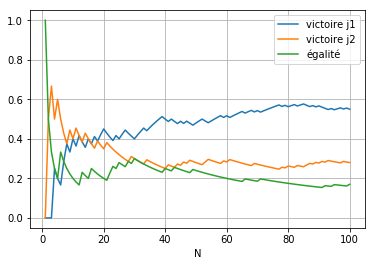

In [25]:

j1 = Joueur_Aleatoire('a')

j2 = Joueur_Aleatoire('b')

N = 100

graphe_vic_moy(j1, j2, N)

probabilité victoire joueur 1: 0.2594358200771254
probabilité victoire joueur 2: 0.618908686479993
probabilité  match null: 0.12165549344288165


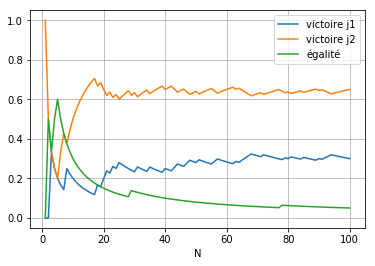

In [26]:
j1 = Joueur_Aleatoire('a')

j2 = Joueur_MonteCarlo('b')

N = 100

graphe_vic_moy(j1, j2, N)


probabilité victoire joueur 1: 0.774824411592048
probabilité victoire joueur 2: 0.15734977431118904
probabilité  match null: 0.06782581409676275


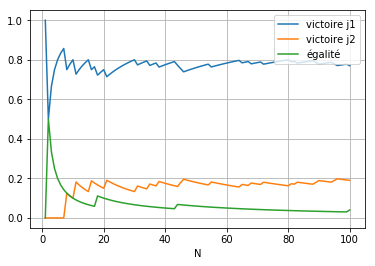

In [27]:
j1 = Joueur_MonteCarlo('a')

j2 = Joueur_Aleatoire('b')

N = 100

graphe_vic_moy(j1, j2, N)

probabilité victoire joueur 1: 0.5812500086849817
probabilité victoire joueur 2: 0.37639328085137264
probabilité  match null: 0.04235671046364576


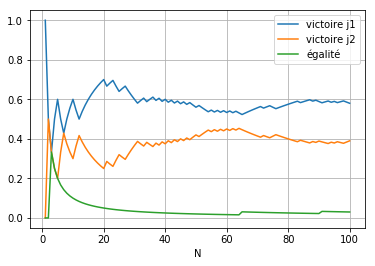

In [28]:
j1 = Joueur_MonteCarlo('a')

j2 = Joueur_MonteCarlo('b')

N = 100

graphe_vic_moy(j1, j2, N)
